# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


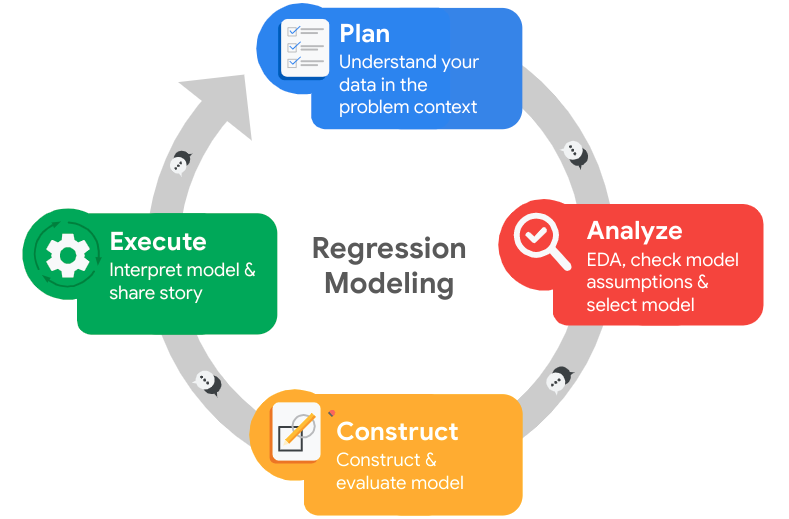

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




 - My stakeholder are the executive team, Human Resources department, and myself since I am part of the company. We all hold a stake in seeing Salifort Motors be a successful company that it's employess love to work at and a culture that promotes professional developments and advancement.

- I am trying to solve a problem with employee churn. I need to figure out what is making employees leave, evaluate the problem, then figure out solution to manage and tranform it.

- My intial observations after EDA is that our dataset has a lot of duplicates variable for the tenure of employees "time_spent_at_company'

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [62]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split, PredefinedSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.utils import class_weight
import time
from scipy.stats.mstats import winsorize 

In [63]:
conda update scikit-learn

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/linux-64::ipykernel==5.5.5=py37h085eea5_0
  - conda-forge/noarch::imageio==2.8.0=py_0
  - conda-forge/linux-64::numpy==1.20.3=py37h3e96413_2
  - conda-forge/noarch::send2trash==1.5.0=py_0
  - conda-forge/noarch::pamela==1.2.0=pyhff2d567_0
  - conda-forge/noarch::joblib==1.3.2=pyhd8ed1ab_0
  - conda-forge/linux-64::soupsieve==2.0.1=py37hc8dfbb8_0
  - conda-forge/linux-64::llvmlite==0.31.0=py37h5202443_1
  - conda-forge/noarch::certifi==2024.2.2=pyhd8ed1ab_0
  - conda-forge/linux-64::mpc==1.3.1=h24ddda3_1
  - conda-forge/noarch::charset-normalizer==3.3.2=pyhd8ed1ab_0
  - conda-forge/linux-64::numexpr==2.7.1=py37h0da4684_1
  - conda-forge/noarch::fsspec==2022.11.0=pyhd8ed1ab_0
  - conda-forge/noarch::dask==2.15.0=py_0
  - conda-forge/linux-64::beautifulsoup4==4.9.0=py37hc8dfbb8_0
  - conda-forge/noarch::ipython_genutils==0.

done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 25.1.1

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [65]:
from imblearn.over_sampling import SMOTE
print("imblearn is installed!")

imblearn is installed!


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [66]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [67]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [68]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [69]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [70]:
# Rename columns as needed
df0.rename(columns={'number_project': 'number_of_projects', 'time_spend_company': 'time_spent_at_company',
                   'Work_accident': 'work_accidents', 'promotion_last_5years': 'promotion_inlast_5years'}, inplace=True)


# Display all column names after the update
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spent_at_company', 'work_accidents',
       'left', 'promotion_inlast_5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [71]:
# Check for missing values
df0.isna().sum()


satisfaction_level         0
last_evaluation            0
number_of_projects         0
average_montly_hours       0
time_spent_at_company      0
work_accidents             0
left                       0
promotion_inlast_5years    0
Department                 0
salary                     0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [72]:
# Check for duplicates
df0.duplicated().sum()


3008

In [73]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()


# Display first few rows of new dataframe as neede
df1.duplicated().sum()

0

### Check outliers

Check for outliers in the data.

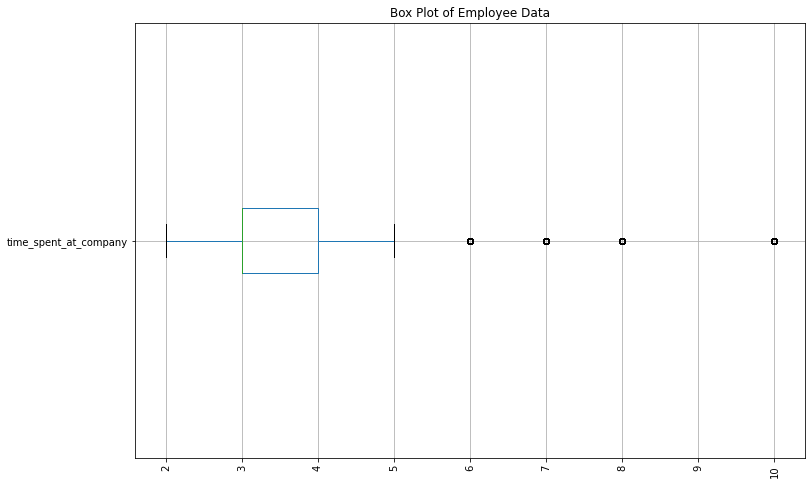

In [74]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

df1.boxplot(column=['time_spent_at_company'], vert=False)
# Set the title of the plot
plt.title('Box Plot of Employee Data')
# Make the labels horizontal
plt.xticks(rotation=90)
# Display Plot
plt.show()




We see that 'tenure' or 'time_spent_at_company' has outliers from 6-10

In [75]:
# Determine the number of rows containing outliers
def count_outliers(df, columns):
    """Counts rows with outliers and returns outlier indices using IQR method."""
    outlier_rows = set()
    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_rows.update(outliers.index)

    return len(outlier_rows), list(outlier_rows)  # Return both count and indices

# ... (your code to load df1 and define numeric_cols) ...
# Define numeric_cols 
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spent_at_company', 'work_accidents',
       'left', 'promotion_inlast_5years']  

num_outliers, outlier_rows_list = count_outliers(df1, numeric_cols) # Get both the number of outliers and their indices
print(f"Number of rows containing outliers: {num_outliers}")

# Drop the outlier rows *only if there are any*
if outlier_rows_list: # Check if the list is not empty
    df1_filtered = df1.drop(outlier_rows_list)
    print(f"Shape of original df1: {df1.shape}")
    print(f"Shape of df1 after dropping outliers: {df1_filtered.shape}")
else:
  print("No outliers found.")
  df1_filtered = df1 # If no outliers, df1_filtered is the same as df1

# ... (rest of your data preprocessing and modeling code using df1_filtered) ...


Number of rows containing outliers: 4425
Shape of original df1: (11991, 10)
Shape of df1 after dropping outliers: (7566, 10)


In [76]:
print(df1_filtered.shape)
print(df1.shape)

(7566, 10)
(11991, 10)


We see that we lost a lot of data dropping outliers. 

In [77]:
print(df1['time_spent_at_company'].value_counts())
print(df1_filtered['time_spent_at_company'].value_counts())

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spent_at_company, dtype: int64
3    3522
2    2348
4    1246
5     450
Name: time_spent_at_company, dtype: int64


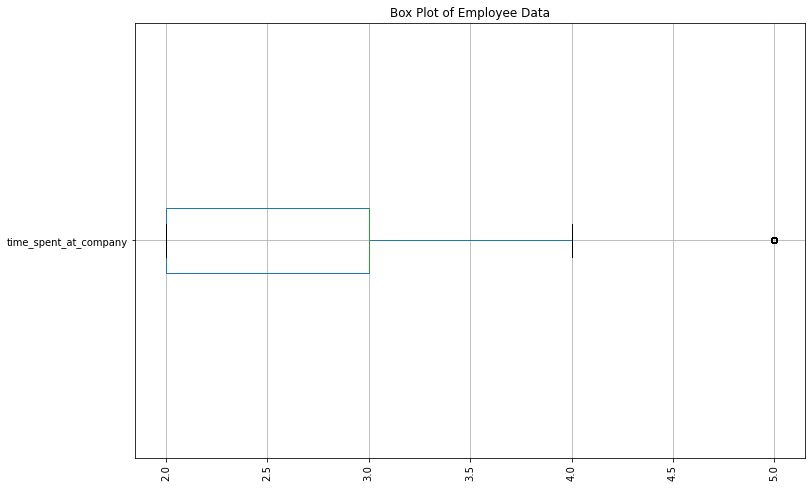

In [78]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

df1_filtered.boxplot(column=['time_spent_at_company'], vert=False)
# Set the title of the plot
plt.title('Box Plot of Employee Data')
# Make the labels horizontal
plt.xticks(rotation=90)
# Display Plot
plt.show()




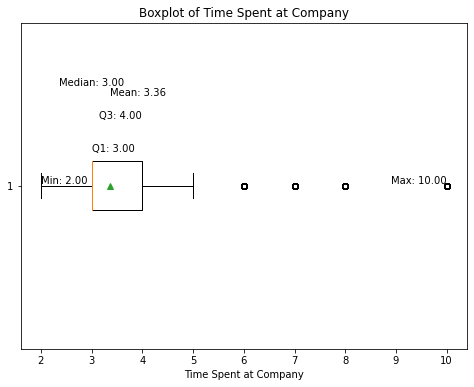

In [79]:
# Create the boxplot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.boxplot(df1['time_spent_at_company'], vert=False, showmeans=True)

# Add title and labels
plt.title('Boxplot of Time Spent at Company')
plt.xlabel('Time Spent at Company')

# Get the 5-number summary statistics
summary = df1['time_spent_at_company'].describe()

# Annotate the boxplot with the 5-number summary
plt.text(summary['min'], 1.0, f"Min: {summary['min']:.2f}", ha='left', va='bottom')
plt.text(summary['25%'], 1.1, f"Q1: {summary['25%']:.2f}", ha='left', va='bottom')
plt.text(summary['50%'], 1.3, f"Median: {summary['50%']:.2f}", ha='center', va='bottom')
plt.text(summary['mean'], 1.3, f"Mean: {summary['mean']:.2f}", ha='left', va='top')  # Add mean
plt.text(summary['75%'], 1.2, f"Q3: {summary['75%']:.2f}", ha='right', va='bottom')
plt.text(summary['max'], 1.0, f"Max: {summary['max']:.2f}", ha='right', va='bottom')

# Show the plot
plt.show()

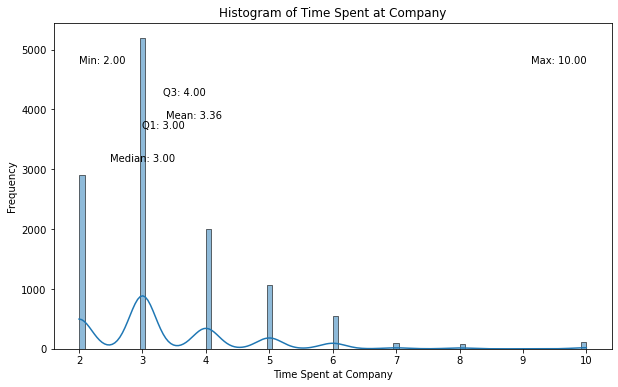

In [80]:
# Create the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.histplot(df1['time_spent_at_company'], kde=True) # Added Kernel Density Estimate
plt.title('Histogram of Time Spent at Company')
plt.xlabel('Time Spent at Company')
plt.ylabel('Frequency')

# Get the 5-number summary statistics
summary = df1['time_spent_at_company'].describe()

# Annotate the histogram with the 5-number summary (adjust positions as needed)
y_max = plt.gca().get_ylim()[1] # Get the maximum y value for positioning

plt.text(summary['min'], y_max * 0.9, f"Min: {summary['min']:.2f}", ha='left', va='top')
plt.text(summary['25%'], y_max * 0.7, f"Q1: {summary['25%']:.2f}", ha='left', va='top')
plt.text(summary['50%'], y_max * 0.6, f"Median: {summary['50%']:.2f}", ha='center', va='top')
plt.text(summary['mean'], y_max * 0.7, f"Mean: {summary['mean']:.2f}", ha='left', va='bottom')  # Add mean
plt.text(summary['75%'], y_max * 0.8, f"Q3: {summary['75%']:.2f}", ha='right', va='top')
plt.text(summary['max'], y_max * 0.9, f"Max: {summary['max']:.2f}", ha='right', va='top')



plt.show()

- The "typical" employee tenure is around 3 years (represented by the median.

- There's a **positive skew** in the data, meaning that while many employees stay for a shorter time, some employees have much longer tenures, pulling the mean up slightly.
- The middle 50% of employees have tenures clustered between 3 and 4 years (as shown by the small IQR).
- The presence of outliers and the large range indicate that there are some employees who have been with the company for a significantly longer time than most.  These long tenures are contributing to the positive skew.

The 'time_spent_at_company' variable indicates that most employees stay for a short time (around 3 years), with a concentrated middle 50% between 3 and 4 years. However, there's a long tail of employees who have stayed much longer (up to 10 years), which creates a positive skew and outliers in the data.


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



--- Univariate Analysis for column: satisfaction_level ---
count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64


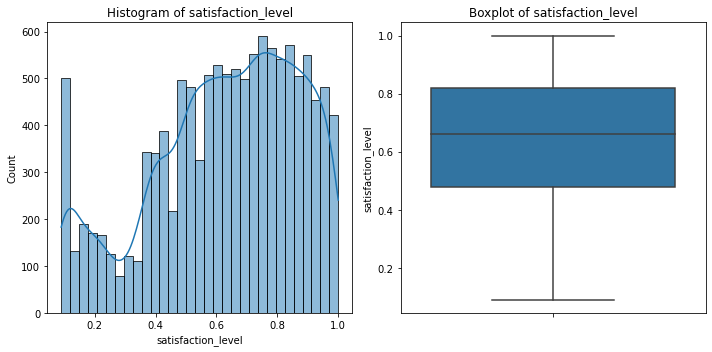

Skewness: -0.5387016649389459
Kurtosis: -0.5218100736754634


--- Univariate Analysis for column: last_evaluation ---
count    11991.000000
mean         0.716683
std          0.168343
min          0.360000
25%          0.570000
50%          0.720000
75%          0.860000
max          1.000000
Name: last_evaluation, dtype: float64


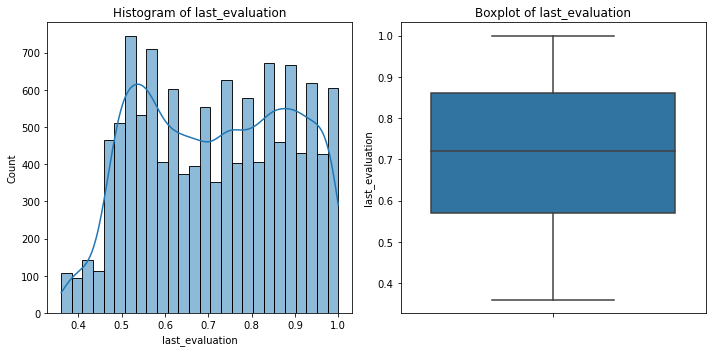

Skewness: -0.031686075200590205
Kurtosis: -1.1792868992124386


--- Univariate Analysis for column: number_of_projects ---
count    11991.000000
mean         3.802852
std          1.163238
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_of_projects, dtype: float64


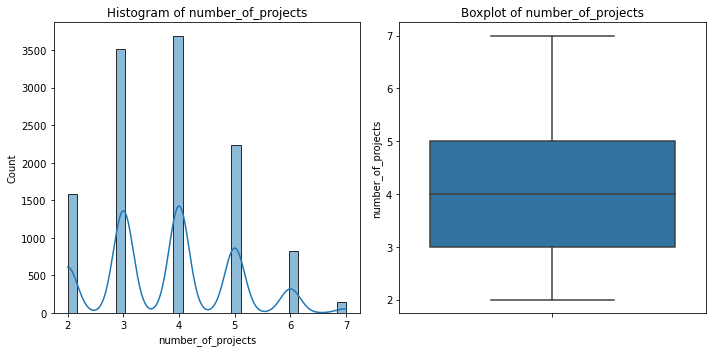

Skewness: 0.33215198654337913
Kurtosis: -0.3953896428196648


--- Univariate Analysis for column: average_montly_hours ---
count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64


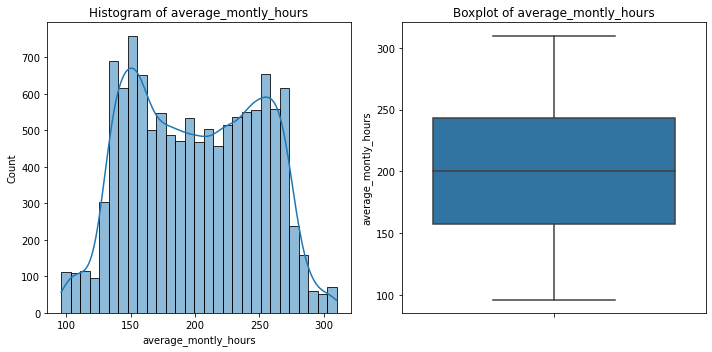

Skewness: 0.02720803700294239
Kurtosis: -1.082930001967359


--- Univariate Analysis for column: time_spent_at_company ---
count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spent_at_company, dtype: float64


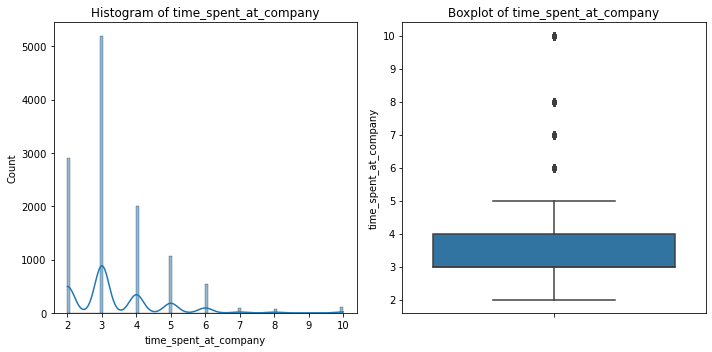

Skewness: 1.81657710843447
Kurtosis: 5.138717610302165


--- Univariate Analysis for column: work_accidents ---
count    11991.000000
mean         0.154282
std          0.361234
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: work_accidents, dtype: float64


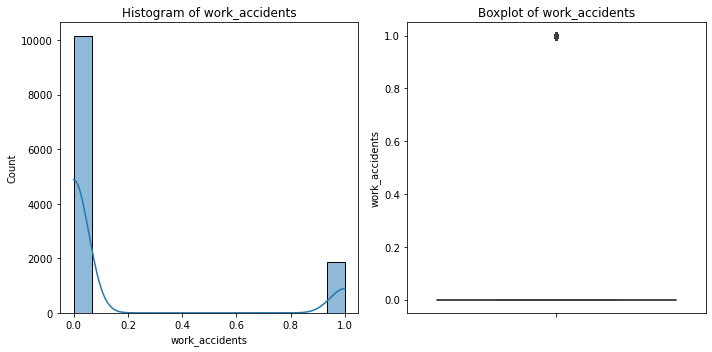

Skewness: 1.9144101686590542
Kurtosis: 1.6652440150281507


--- Univariate Analysis for column: left ---
count    11991.000000
mean         0.166041
std          0.372133
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: left, dtype: float64


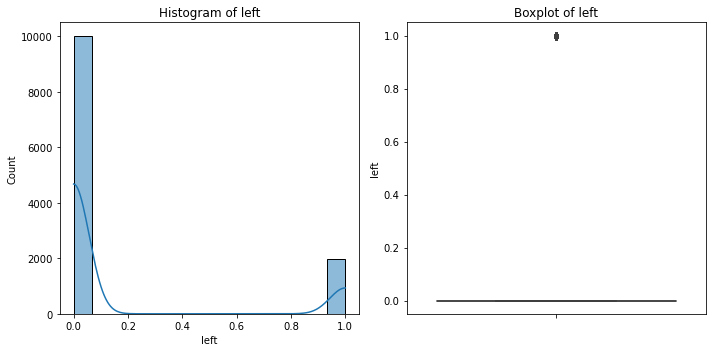

Skewness: 1.7951345122089195
Kurtosis: 1.222711827362831


--- Univariate Analysis for column: promotion_inlast_5years ---
count    11991.000000
mean         0.016929
std          0.129012
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: promotion_inlast_5years, dtype: float64


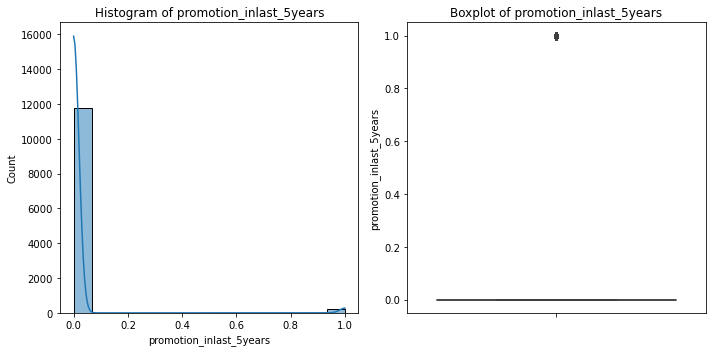

Skewness: 7.490008118269382
Kurtosis: 54.10924656053743


--- Univariate Analysis for column: Department ---
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: Department, dtype: int64

Percentages:
sales          27.011926
technical      18.714036
support        15.186390
IT              8.139438
RandD           5.787674
product_mng     5.720957
marketing       5.612543
accounting      5.178884
hr              5.012092
management      3.636060
Name: Department, dtype: float64


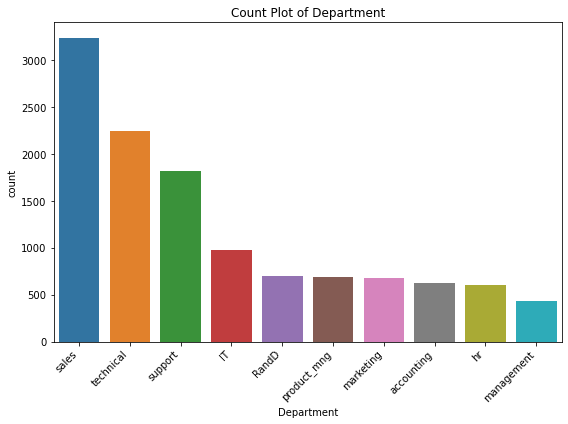



--- Univariate Analysis for column: salary ---
low       5740
medium    5261
high       990
Name: salary, dtype: int64

Percentages:
low       47.869235
medium    43.874573
high       8.256192
Name: salary, dtype: float64


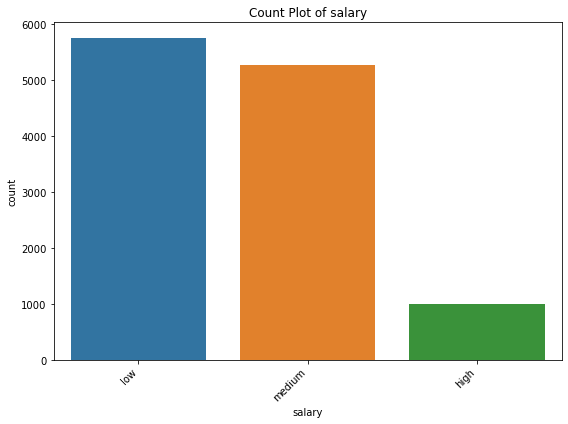

In [81]:
def univariate_analysis(df):
    """Performs univariate analysis on all columns of a DataFrame."""

    for col in df.columns:
        print(f"--- Univariate Analysis for column: {col} ---")

        if pd.api.types.is_numeric_dtype(df[col]):  # Numerical column
            print(df[col].describe())  # Summary statistics

            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)  # Histogram
            sns.histplot(df[col], kde=True)
            plt.title(f'Histogram of {col}')

            plt.subplot(1, 2, 2)  # Boxplot
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot of {col}')

            plt.tight_layout() # Adjust layout to prevent labels from overlapping
            plt.show()

            # Optional: Skewness and Kurtosis
            print(f"Skewness: {df[col].skew()}")
            print(f"Kurtosis: {df[col].kurt()}")
            print("\n")

        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':  # Categorical column
            counts = df[col].value_counts()
            percentages = df[col].value_counts(normalize=True) * 100

            print(counts)
            print("\nPercentages:")
            print(percentages)

            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, data=df, order=counts.index) #Preserve order of counts
            plt.title(f'Count Plot of {col}')
            plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
            plt.tight_layout()
            plt.show()
            print("\n")

        else: #Other data types
             print(f"Column '{col}' has a data type ({df[col].dtype}) that is not currently handled by this function.")
             print("\n")

# Call the function
univariate_analysis(df1)

--- Univariate Analysis for column: satisfaction_level ---
count    7566.000000
mean        0.675447
std         0.210875
min         0.120000
25%         0.550000
50%         0.690000
75%         0.840000
max         1.000000
Name: satisfaction_level, dtype: float64


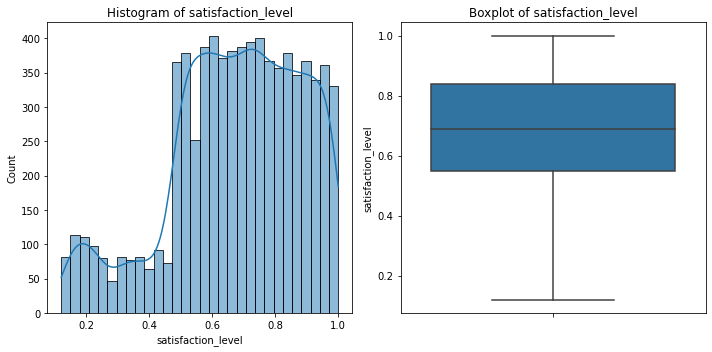

Skewness: -0.6143429287617966
Kurtosis: -0.113040132178309


--- Univariate Analysis for column: last_evaluation ---
count    7566.000000
mean        0.717108
std         0.161021
min         0.360000
25%         0.582500
50%         0.715000
75%         0.850000
max         1.000000
Name: last_evaluation, dtype: float64


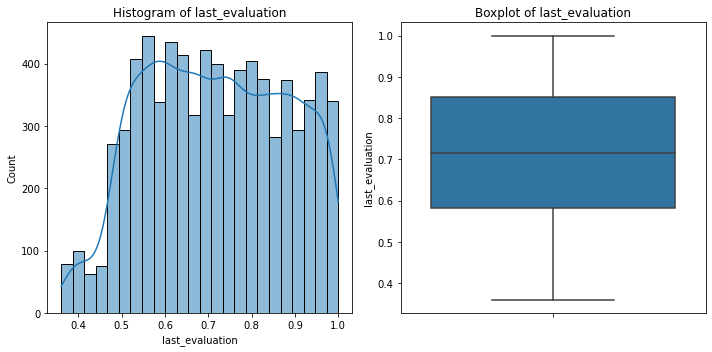

Skewness: -0.026459853418963675
Kurtosis: -1.0184154232905496


--- Univariate Analysis for column: number_of_projects ---
count    7566.000000
mean        3.773328
std         0.963735
min         2.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         6.000000
Name: number_of_projects, dtype: float64


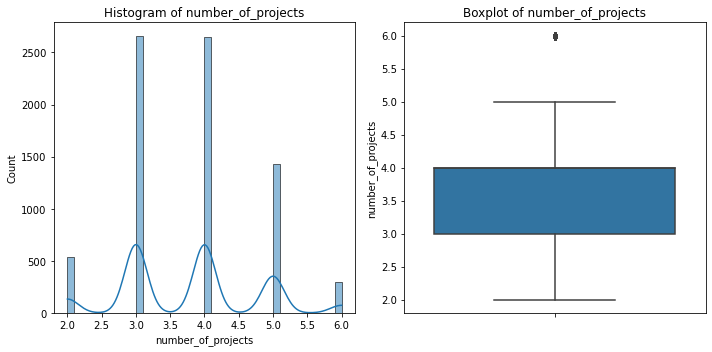

Skewness: 0.25009878709295164
Kurtosis: -0.4309074201305312


--- Univariate Analysis for column: average_montly_hours ---
count    7566.000000
mean      198.992466
std        45.120118
min        96.000000
25%       162.000000
50%       198.000000
75%       238.000000
max       287.000000
Name: average_montly_hours, dtype: float64


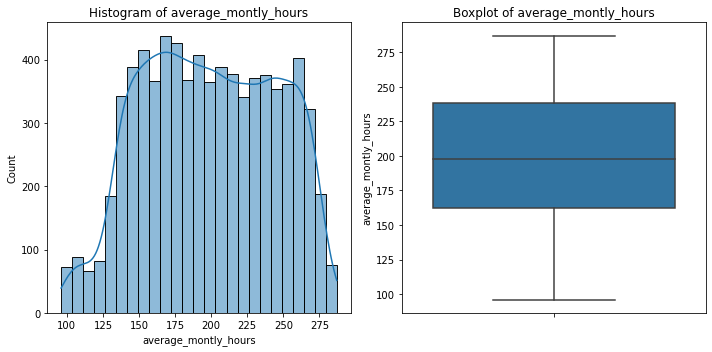

Skewness: -0.049947234302462756
Kurtosis: -0.984514754237833


--- Univariate Analysis for column: time_spent_at_company ---
count    7566.000000
mean        2.973302
std         0.843983
min         2.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: time_spent_at_company, dtype: float64


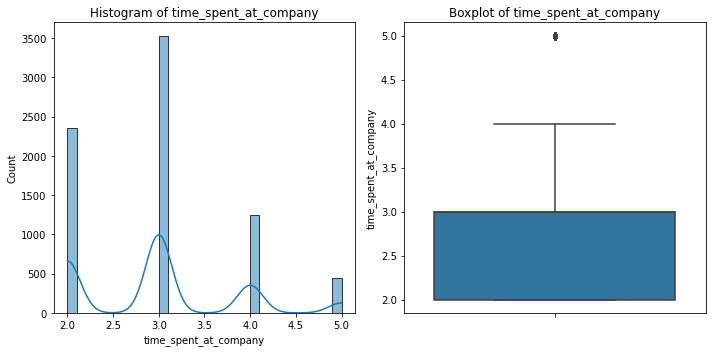

Skewness: 0.6443686410503272
Kurtosis: -0.11124125896836912


--- Univariate Analysis for column: work_accidents ---
count    7566.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: work_accidents, dtype: float64


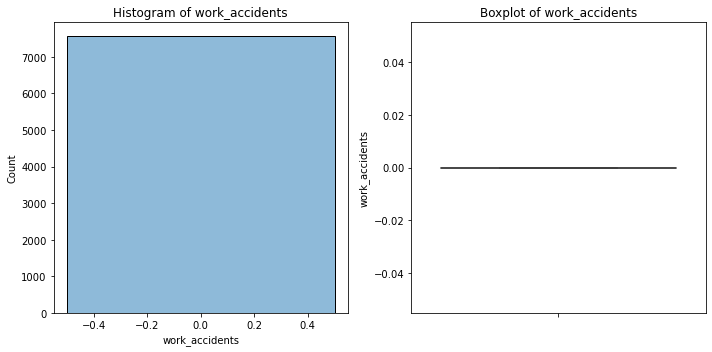

Skewness: 0
Kurtosis: 0


--- Univariate Analysis for column: left ---
count    7566.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: left, dtype: float64


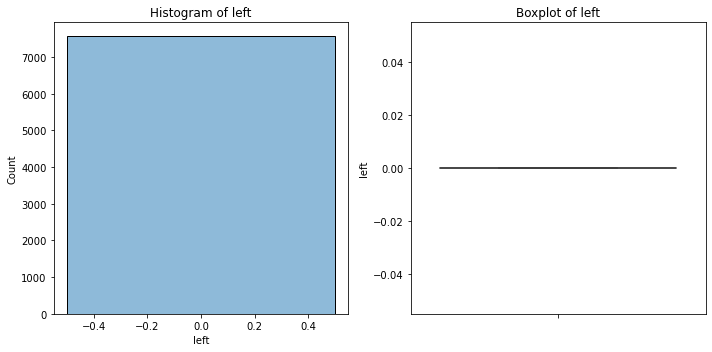

Skewness: 0
Kurtosis: 0


--- Univariate Analysis for column: promotion_inlast_5years ---
count    7566.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: promotion_inlast_5years, dtype: float64


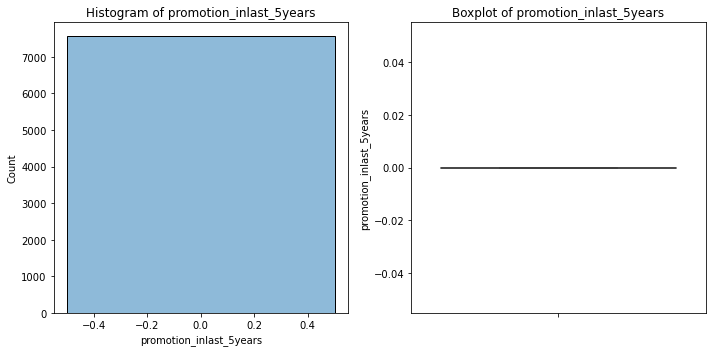

Skewness: 0
Kurtosis: 0


--- Univariate Analysis for column: Department ---
sales          2007
technical      1425
support        1166
IT              642
RandD           449
product_mng     444
marketing       404
accounting      394
hr              386
management      249
Name: Department, dtype: int64

Percentages:
sales          26.526566
technical      18.834259
support        15.411049
IT              8.485329
RandD           5.934444
product_mng     5.868358
marketing       5.339678
accounting      5.207507
hr              5.101771
management      3.291039
Name: Department, dtype: float64


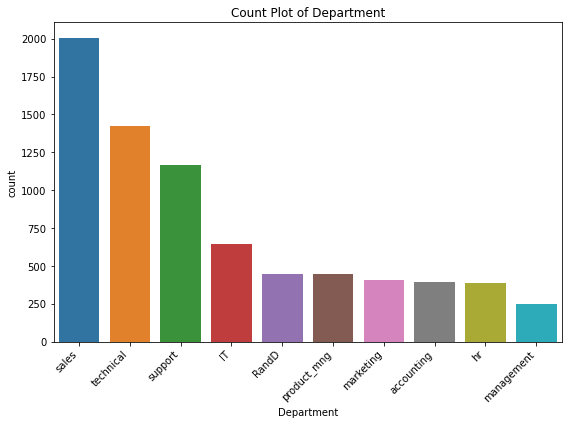



--- Univariate Analysis for column: salary ---
low       3530
medium    3360
high       676
Name: salary, dtype: int64

Percentages:
low       46.656093
medium    44.409199
high       8.934708
Name: salary, dtype: float64


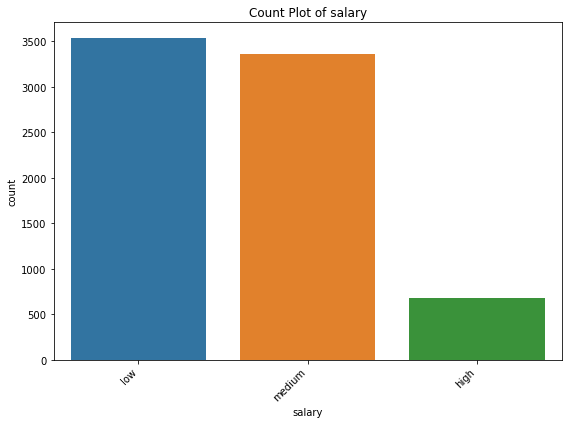

In [82]:
def univariate_analysis(df):
    """Performs univariate analysis on all columns of a DataFrame."""

    for col in df.columns:
        print(f"--- Univariate Analysis for column: {col} ---")

        if pd.api.types.is_numeric_dtype(df[col]):  # Numerical column
            print(df[col].describe())  # Summary statistics

            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)  # Histogram
            sns.histplot(df[col], kde=True)
            plt.title(f'Histogram of {col}')

            plt.subplot(1, 2, 2)  # Boxplot
            sns.boxplot(y=df[col])
            plt.title(f'Boxplot of {col}')

            plt.tight_layout() # Adjust layout to prevent labels from overlapping
            plt.show()

            # Optional: Skewness and Kurtosis
            print(f"Skewness: {df[col].skew()}")
            print(f"Kurtosis: {df[col].kurt()}")
            print("\n")

        elif pd.api.types.is_categorical_dtype(df[col]) or df[col].dtype == 'object':  # Categorical column
            counts = df[col].value_counts()
            percentages = df[col].value_counts(normalize=True) * 100

            print(counts)
            print("\nPercentages:")
            print(percentages)

            plt.figure(figsize=(8, 6))
            sns.countplot(x=col, data=df, order=counts.index) #Preserve order of counts
            plt.title(f'Count Plot of {col}')
            plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
            plt.tight_layout()
            plt.show()
            print("\n")

        else: #Other data types
             print(f"Column '{col}' has a data type ({df[col].dtype}) that is not currently handled by this function.")
             print("\n")

# Call the function
univariate_analysis(df1_filtered)

💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [26]:
left_counts = df1['left'].value_counts()

total_employees = left_counts.sum()

if 1 in left_counts:  # Check if the key 1 exists
    left_percentage = (left_counts[1] / total_employees) * 100
else:
    left_percentage = 0  # Or handle it differently, e.g., print a message

if 0 in left_counts: #Check if the key 0 exists
    stayed_percentage = (left_counts[0] / total_employees) * 100
else:
    stayed_percentage = 0

print(f"Percentage of employees who left: {left_percentage:.2f}%")
print(f"Percentage of employees who stayed: {stayed_percentage:.2f}%")

Percentage of employees who left: 16.60%
Percentage of employees who stayed: 83.40%


In [27]:
left_counts2 = df1_filtered['left'].value_counts()

total_employees2 = left_counts2.sum()

if 1 in left_counts2:  # Check if the key 1 exists
    left_percentage2 = (left_counts2[1] / total_employees2) * 100
else:
    left_percentage2 = 0  # Or handle it differently, e.g., print a message

if 0 in left_counts2: #Check if the key 0 exists
    stayed_percentage2 = (left_counts2[0] / total_employees2) * 100
else:
    stayed_percentage2 = 0

print(f"Percentage of employees who left: {left_percentage2:.2f}%")
print(f"Percentage of employees who stayed: {stayed_percentage2:.2f}%")

Percentage of employees who left: 0.00%
Percentage of employees who stayed: 100.00%


In [28]:
print(df1['left'].value_counts())
print(df1_filtered['left'].value_counts())

0    10000
1     1991
Name: left, dtype: int64
0    7566
Name: left, dtype: int64


We see that removing all outliers from the data set completely eliminates our class[1] of who left the company. It may be best to use a Random Forest Model, and/or XGBoost, which is robust to outliers. We should do a log tranformation just to see if they are true anamolies and if outlier should be dropped.

Log transformation applied to 'time_spent_at_company'.


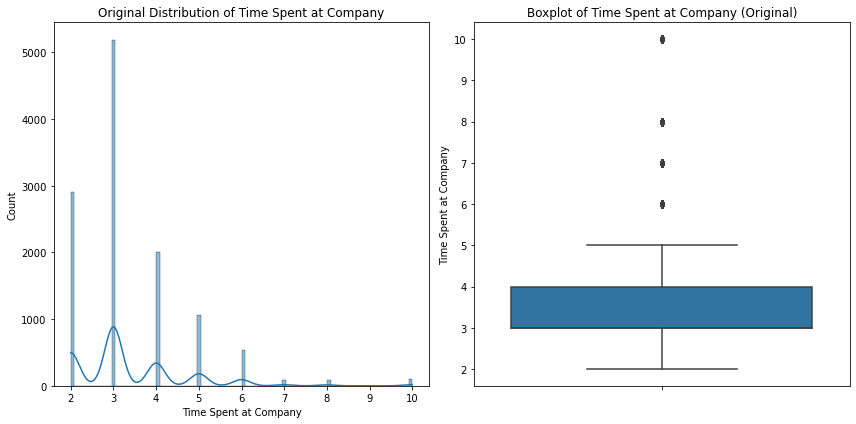

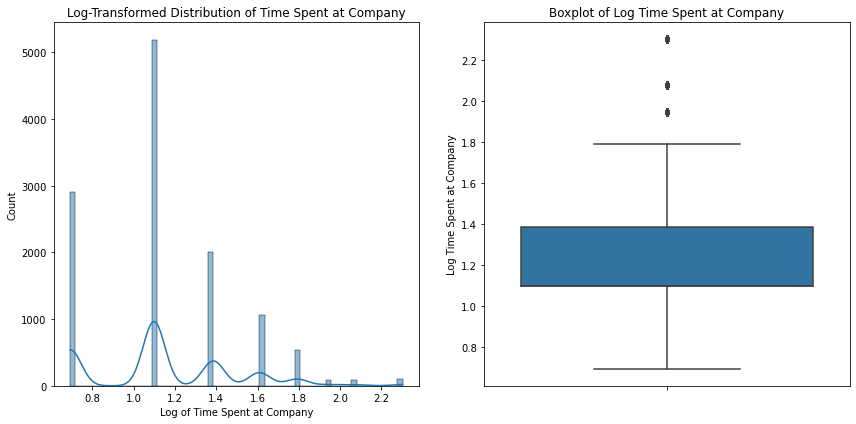

In [83]:
# Apply log transformation to 'time_spent_at_company' (handling 0 values if present)
if (df1['time_spent_at_company'] <= 0).any():
    df1['time_spent_at_company_log'] = np.log1p(df1['time_spent_at_company'])
    print("Log transformation applied to 'time_spent_at_company' (with 1 added).")
else:
    df1['time_spent_at_company_log'] = np.log(df1['time_spent_at_company'])
    print("Log transformation applied to 'time_spent_at_company'.")


# Create visualizations to assess the impact of the transformation and outliers

# 1. Original Distribution (with outliers)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(df1['time_spent_at_company'], kde=True)
plt.title('Original Distribution of Time Spent at Company')
plt.xlabel('Time Spent at Company')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(y=df1['time_spent_at_company'])  # Vertical boxplot for easier outlier visualization
plt.title('Boxplot of Time Spent at Company (Original)')
plt.ylabel('Time Spent at Company')
plt.tight_layout()
plt.show()


# 2. Transformed Distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1['time_spent_at_company_log'], kde=True)
plt.title('Log-Transformed Distribution of Time Spent at Company')
plt.xlabel('Log of Time Spent at Company')

plt.subplot(1, 2, 2)
sns.boxplot(y=df1['time_spent_at_company_log']) # Vertical boxplot for easier outlier visualization
plt.title('Boxplot of Log Time Spent at Company')
plt.ylabel('Log Time Spent at Company')

plt.tight_layout()
plt.show()


After log transformation I ams till going to keep outliers. But lets try winsorizing "time_spent_at_company' varialbe.

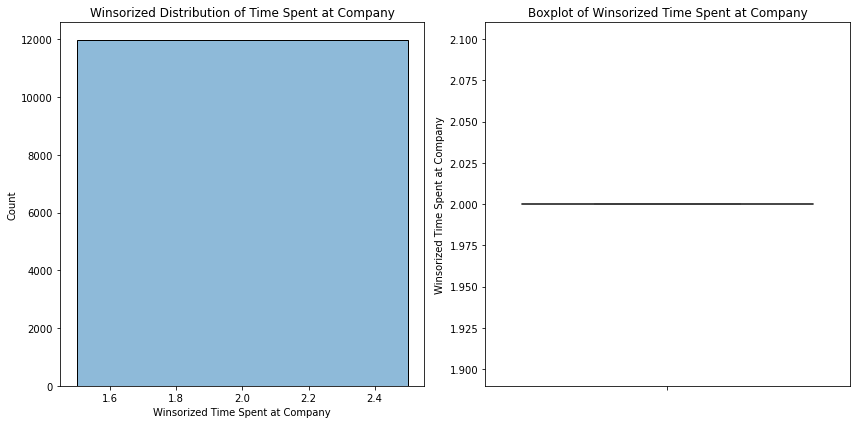

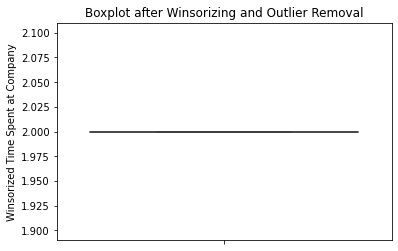

In [84]:
# 1. Winsorize 'time_spent_at_company'

# Calculate percentiles for winsorizing (e.g., 10% and 90%)
lower_bound_percentile = 0.10
upper_bound_percentile = 0.90

# Winsorize the data
df1['time_spent_at_company_winsorized'] = winsorize(df1['time_spent_at_company'], 
                                                    limits=[lower_bound_percentile, upper_bound_percentile])

# 2. Visualize Winsorized Data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df1['time_spent_at_company_winsorized'], kde=True)
plt.title('Winsorized Distribution of Time Spent at Company')
plt.xlabel('Winsorized Time Spent at Company')

plt.subplot(1, 2, 2)
sns.boxplot(y=df1['time_spent_at_company_winsorized'])
plt.title('Boxplot of Winsorized Time Spent at Company')
plt.ylabel('Winsorized Time Spent at Company')

plt.tight_layout()
plt.show()



# 3. Outlier Removal based on Winsorized Data (if still needed)

# Calculate IQR on the winsorized data (if you still see outliers after winsorizing)
Q1_winsorized = df1['time_spent_at_company_winsorized'].quantile(0.25)
Q3_winsorized = df1['time_spent_at_company_winsorized'].quantile(0.75)
IQR_winsorized = Q3_winsorized - Q1_winsorized

upper_bound_winsorized = Q3_winsorized + 1.5 * IQR_winsorized #Or 3*IQR

# Filter out outliers (if any remain after winsorizing)
df2_filtered = df1[df1['time_spent_at_company_winsorized'] <= upper_bound_winsorized]


# 4. Visualize again after outlier removal (if performed)
if 'df1_filtered' in locals(): #Check if df1_filtered exists before plotting
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df2_filtered['time_spent_at_company_winsorized'])
    plt.title('Boxplot after Winsorizing and Outlier Removal')
    plt.ylabel('Winsorized Time Spent at Company')
    plt.show()

In [85]:
print(df2_filtered['left'].value_counts())

0    10000
1     1991
Name: left, dtype: int64


We see the Winsor method kept data seemingly intact but we have an empty box plot

In [86]:
lower_bound_percentile = 0.10  # Adjust as needed
upper_bound_percentile = 0.90  # Adjust as needed

df1['time_spent_at_company_winsorized'] = winsorize(df1['time_spent_at_company'], limits=[lower_bound_percentile, upper_bound_percentile])

print(df1['time_spent_at_company_winsorized'].describe())  # Check summary statistics


count    11991.0
mean         2.0
std          0.0
min          2.0
25%          2.0
50%          2.0
75%          2.0
max          2.0
Name: time_spent_at_company_winsorized, dtype: float64


The winsorization is too aggressive even with adjust precentiles. No transformation or outlier removal may not be appropriate and just use models like RF and XGBoost that are robust to outliers.

count    11991.000000
mean         3.364857
std          1.330240
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spent_at_company, dtype: float64


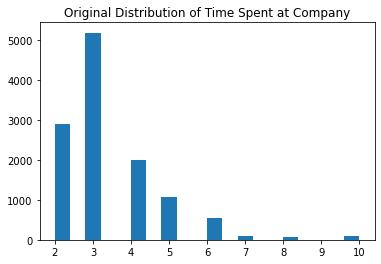

In [87]:
print(df1['time_spent_at_company'].describe())
plt.hist(df1['time_spent_at_company'], bins=20)  # Adjust bins as needed
plt.title('Original Distribution of Time Spent at Company')
plt.show()

Looking at the original data set it seems that the winsorization technique squashed everything down to 2. The number 2 being close to our mean and more 2 in out data set than 10's, 9's, 8's, 7's etc. It squished the data closer to the lower boundary which is too extreme.

In [88]:
# Create the crosstab
crosstab_left_projects = pd.crosstab(df1['left'], df1['number_of_projects'])

# Print the crosstab
print("Crosstab of Employees by 'Left' Status and Number of Projects:")
print(crosstab_left_projects)

# Optional: Add margins for totals
crosstab_with_margins = pd.crosstab(df1['left'], df1['number_of_projects'], margins=True, margins_name="Total")
print("\nCrosstab with Margins:")
print(crosstab_with_margins)

# Convert to percentages for easier interpretation (row-wise)
crosstab_percentages = crosstab_left_projects.div(crosstab_left_projects.sum(axis=1), axis=0) * 100
print("\nCrosstab as Percentages (Row-wise):")
print(crosstab_percentages)

Crosstab of Employees by 'Left' Status and Number of Projects:
number_of_projects    2     3     4     5    6    7
left                                               
0                   725  3482  3448  1890  455    0
1                   857    38   237   343  371  145

Crosstab with Margins:
number_of_projects     2     3     4     5    6    7  Total
left                                                       
0                    725  3482  3448  1890  455    0  10000
1                    857    38   237   343  371  145   1991
Total               1582  3520  3685  2233  826  145  11991

Crosstab as Percentages (Row-wise):
number_of_projects          2          3          4          5          6  \
left                                                                        
0                    7.250000  34.820000  34.480000  18.900000   4.550000   
1                   43.043697   1.908589  11.903566  17.227524  18.633852   

number_of_projects         7  
left                        

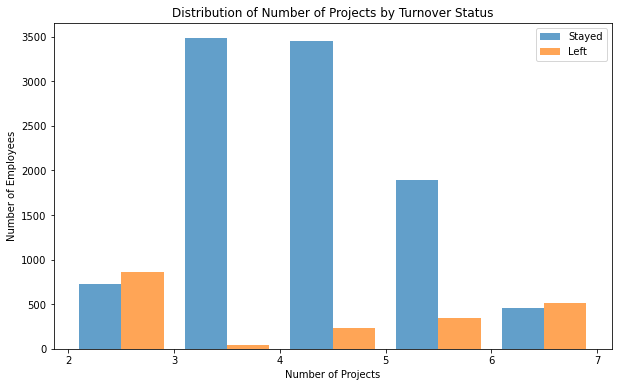

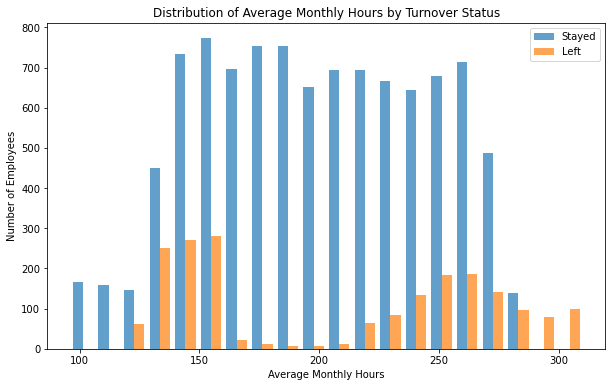

<Figure size 576x432 with 0 Axes>

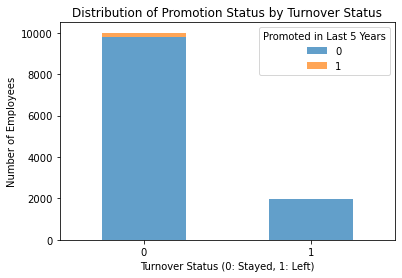

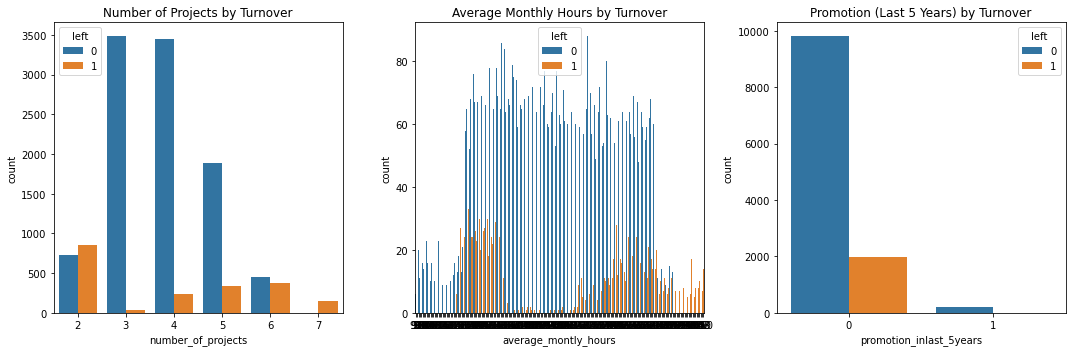

In [89]:
# Separate data for employees who left and stayed
left_0 = df1[df1['left'] == 0]
left_1 = df1[df1['left'] == 1]

# 1. Number of Projects
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist([left_0['number_of_projects'], left_1['number_of_projects']], 
         bins=range(df1['number_of_projects'].min(), df1['number_of_projects'].max() + 1),  # Integer bins
         alpha=0.7, label=['Stayed', 'Left'],
         rwidth=0.8)  # Makes the bars wider

plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Distribution of Number of Projects by Turnover Status')
plt.legend(loc='upper right')
plt.xticks(range(df1['number_of_projects'].min(), df1['number_of_projects'].max() + 1))  # Integer ticks
plt.show()

# 2. Average Monthly Hours
plt.figure(figsize=(10, 6))
plt.hist([left_0['average_montly_hours'], left_1['average_montly_hours']], 
         bins=20,  # Or adjust as needed
         alpha=0.7, label=['Stayed', 'Left'])

plt.xlabel('Average Monthly Hours')
plt.ylabel('Number of Employees')
plt.title('Distribution of Average Monthly Hours by Turnover Status')
plt.legend(loc='upper right')
plt.show()

# 3. Promotion in Last 5 Years (Stacked Bar Chart)
plt.figure(figsize=(8, 6))
pd.crosstab(df1['left'], df1['promotion_inlast_5years']).plot(kind='bar', stacked=True, alpha=0.7)
plt.xlabel('Turnover Status (0: Stayed, 1: Left)')
plt.ylabel('Number of Employees')
plt.title('Distribution of Promotion Status by Turnover Status')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Promoted in Last 5 Years')
plt.show()


# 4. Combined Plot (Optional - requires Seaborn)
# This requires seaborn and might be a little more complex, but it's great for exploration

import seaborn as sns
plt.figure(figsize=(15, 5))  # Adjust size as needed

plt.subplot(1, 3, 1) # 1 row, 3 columns, first plot
sns.countplot(x='number_of_projects', hue='left', data=df1)
plt.title('Number of Projects by Turnover')

plt.subplot(1, 3, 2) # 1 row, 3 columns, second plot
sns.countplot(x='average_montly_hours', hue='left', data=df1)
plt.title('Average Monthly Hours by Turnover')

plt.subplot(1, 3, 3) # 1 row, 3 columns, third plot
sns.countplot(x='promotion_inlast_5years', hue='left', data=df1)
plt.title('Promotion (Last 5 Years) by Turnover')

plt.tight_layout() # Adjust subplot params so that subplots fit in to the figure area.
plt.show()

### Number of Projects by Turnover:

- Clear Separation: There's a noticeable difference in the distribution of the number of projects between employees who stayed (0) and those who left (1).

- Higher Projects, Higher Turnover: Employees who left are more likely to have worked on a larger number of projects (5, 6, 7). The peak for those who left is at 7 projects.

- Bimodal Distribution for Stayed Employees: Employees who stayed show a bimodal distribution with peaks at 3 and 4 projects. This might represent different roles or workload management styles within the "stayed" group.

- Possible Overload: The data suggests that a higher number of projects might be a contributing factor to employees leaving. It could indicate excessive workload or a lack of work-life balance.

### Average Monthly Hours by Turnover:

- Concentration of "Left" Employees in Higher Hours: Employees who left tend to have worked more average monthly hours. The distribution for the "left" group is skewed towards the higher end.

- Less Distinct Separation: While there's a trend, the separation between the "stayed" and "left" groups isn't as clear-cut as with the number of projects. There are still many employees who stayed despite working long hours.

- Potential Burnout: The data hints that excessive working hours might be a factor in employee turnover, possibly due to burnout or work-related stress.

### Promotion (Last 5 Years) by Turnover:

- Strong Relationship: There's a strong visual relationship between lack of promotion and turnover.

- Far Fewer Promotions for "Left" Employees: The vast majority of employees who left did not receive a promotion in the last 5 years.

- Promotion as a Retention Factor: This suggests that lack of promotion opportunities might be a significant factor driving turnover. Employees who feel stagnant in their careers might be more likely to seek opportunities elsewhere.

In [90]:
df1 = pd.get_dummies(df1, columns=['Department', 'salary'], drop_first=True) #drop_first to avoid multicollinearity

In [91]:
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_montly_hours,time_spent_at_company,work_accidents,left,promotion_inlast_5years,time_spent_at_company_log,time_spent_at_company_winsorized,...,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1.098612,2,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1.791759,2,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1.386294,2,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1.609438,2,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1.098612,2,...,0,0,0,0,0,1,0,0,1,0


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

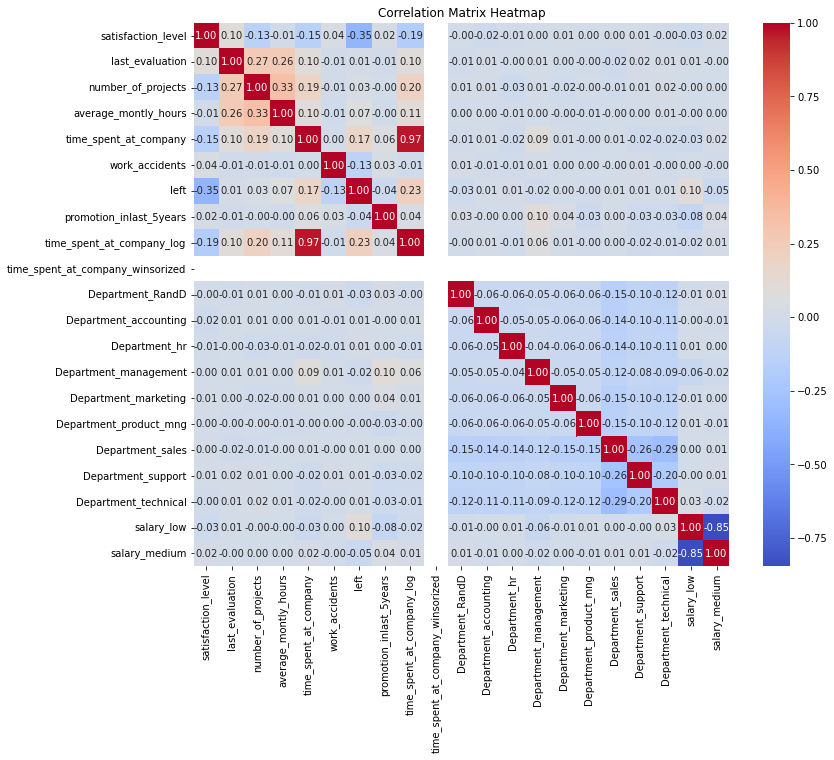

In [92]:
# Create a plot as needed
# Calculate the correlation matrix
correlation_matrix = df1.corr()  

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True for values, other colormaps available
plt.title('Correlation Matrix Heatmap')
plt.show()

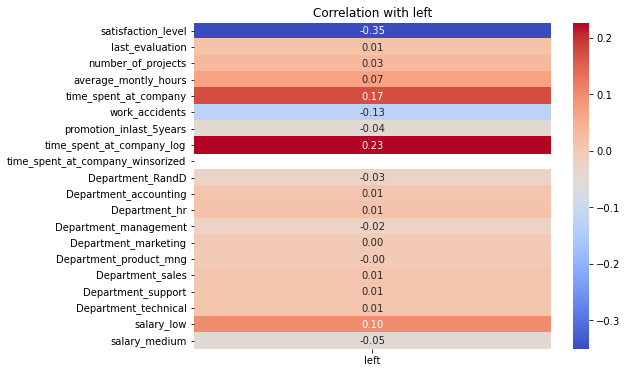

In [93]:
# Create a plot as needed
# Focus on correlations with a target variable (e.g., 'left')
target_variable = 'left' # Replace with your target variable name if different
if target_variable in df1.columns: #Check if the target variable exists
    correlation_with_target = df1.corr()[target_variable].drop(target_variable) # Calculate correlation with the target and drop the self correlation.
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation with {target_variable}')
    plt.show()


### Insights

We see that the correlation heatmap higlights the positive linear correlation between our target variable('left'), with features like: 'time_spent_at_company, average_monthly_hour, number_of_projects, and last_evalutaion. Although these correlations are postive they are not very strong, meaning that multicollinearity may not be a concern. 

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


# Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

In [94]:
# construct model
# Separate features (X) and target (y)
X = df1.drop('left', axis=1)
y = df1['left']

# Split data into training and testing sets
# Stratify to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 

In [95]:
# Using class weights to address imbalance:

# Calculate class weights
class_weights = class_weight.compute_class_weight('balanced', classes=y_train.unique(), y=y_train)
class_weights_dict = dict(zip(y_train.unique(), class_weights)) #Convert to dictionary

In [96]:
# Train Random Forest with class weights
rf_model_balanced = RandomForestClassifier(random_state=42, class_weight=class_weights_dict) #Pass the class weights

In [97]:
# fit model
rf_model_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5995749468683585,
                                     1: 3.01067168863779},
                       random_state=42)

In [98]:
# Make predictions on the test set
y_pred_balanced = rf_model_balanced.predict(X_test)

In [99]:
# Evaluate the model
print("Random Forest with Class Weights:")
print(classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))


Random Forest with Class Weights:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.99      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

Confusion Matrix:
 [[1996    5]
 [  32  366]]
Accuracy: 0.9845769070446019


AUC (Class Weights): 0.9786250091034883


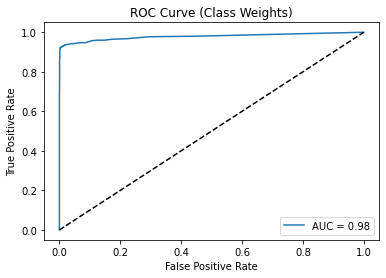

In [100]:
# Get predicted probabilities for the positive class (important for AUC)
y_prob_balanced_1 = rf_model_balanced.predict_proba(X_test)[:, 1]  # [:, 1] gets the probability of class 1

# Calculate AUC
auc_balanced = roc_auc_score(y_test, y_prob_balanced_1)
print(f"AUC (Class Weights): {auc_balanced}")

# Plot ROC curve (optional but highly recommended)
fpr, tpr, _ = roc_curve(y_test, y_prob_balanced_1)
plt.plot(fpr, tpr, label=f"AUC = {auc_balanced:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Class Weights)')
plt.legend()
plt.show()

In [101]:
# 2. Using SMOTE to oversample the minority class (alternative):

from imblearn.over_sampling import SMOTE #Install imbalanced-learn package if you don't have it

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest on the SMOTE-resampled data
rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_smote = rf_model_smote.predict(X_test)

# Evaluate the model
print("\nRandom Forest with SMOTE:")
print(classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("Accuracy:", accuracy_score(y_test, y_pred_smote))


Random Forest with SMOTE:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2001
           1       0.97      0.92      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

Confusion Matrix:
 [[1991   10]
 [  31  367]]
Accuracy: 0.9829095456440183


AUC SMOTE (Class Weights): 0.9773618216017619


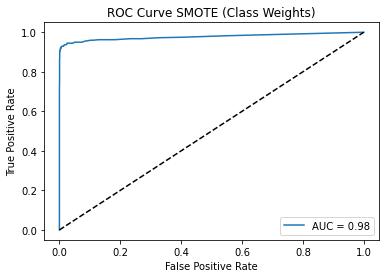

In [116]:
# Get predicted probabilities for the positive class (important for AUC)
y_prob_smote_1 = rf_model_smote.predict_proba(X_test)[:, 1]  # [:, 1] gets the probability of class 1

# Calculate AUC
auc_smote = roc_auc_score(y_test, y_prob_smote_1)
print(f"AUC SMOTE (Class Weights): {auc_smote}")

# Plot ROC curve (optional but highly recommended)
fpr, tpr, _ = roc_curve(y_test, y_prob_smote_1)
plt.plot(fpr, tpr, label=f"AUC = {auc_smote:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SMOTE (Class Weights)')
plt.legend()
plt.show()

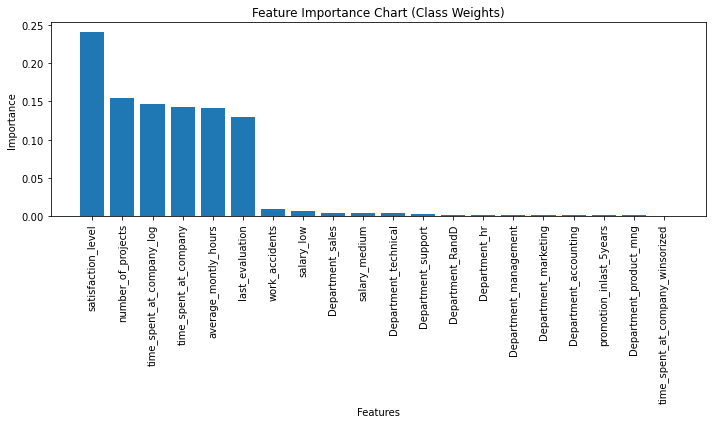

                             Feature  Importance
0                 satisfaction_level    0.241178
2                 number_of_projects    0.154719
7          time_spent_at_company_log    0.146954
4              time_spent_at_company    0.142249
3               average_montly_hours    0.141022
1                    last_evaluation    0.129472
5                     work_accidents    0.009481
18                        salary_low    0.007229
15                  Department_sales    0.004405
19                     salary_medium    0.004353
17              Department_technical    0.003966
16                Department_support    0.003180
9                   Department_RandD    0.002071
11                     Department_hr    0.002001
12             Department_management    0.001823
13              Department_marketing    0.001614
10             Department_accounting    0.001522
6            promotion_inlast_5years    0.001488
14            Department_product_mng    0.001273
8   time_spent_at_co

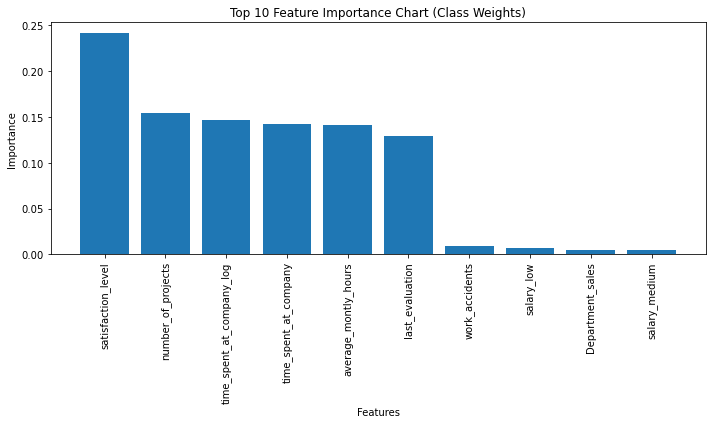

In [48]:
# Get feature importances
importances_balanced = rf_model_balanced.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_balanced = pd.DataFrame({'Feature': X.columns, 'Importance': importances_balanced})

# Sort the DataFrame by importance (descending)
feature_importance_df_balanced = feature_importance_df_balanced.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(feature_importance_df_balanced['Feature'], feature_importance_df_balanced['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Chart (Class Weights)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#Optional: Print the feature importance
print(feature_importance_df_balanced)

#If you have many features you might want to show only the top n:

n_top_features = 10 #Show the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_balanced['Feature'][:n_top_features], feature_importance_df_balanced['Importance'][:n_top_features]) #Slicing the dataframe
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Top {n_top_features} Feature Importance Chart (Class Weights)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


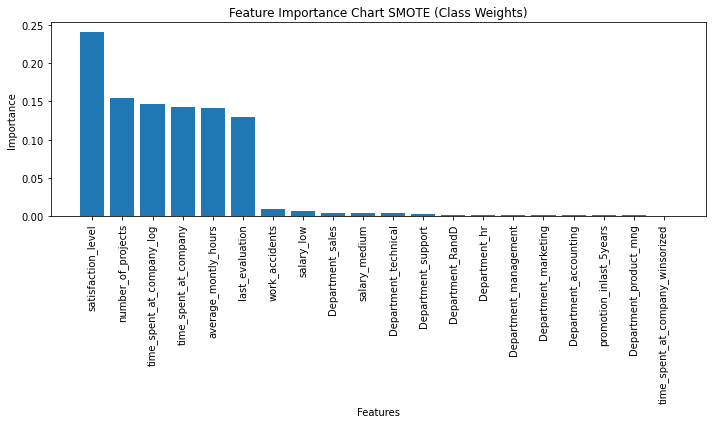

                             Feature  Importance
0                 satisfaction_level    0.241178
2                 number_of_projects    0.154719
7          time_spent_at_company_log    0.146954
4              time_spent_at_company    0.142249
3               average_montly_hours    0.141022
1                    last_evaluation    0.129472
5                     work_accidents    0.009481
18                        salary_low    0.007229
15                  Department_sales    0.004405
19                     salary_medium    0.004353
17              Department_technical    0.003966
16                Department_support    0.003180
9                   Department_RandD    0.002071
11                     Department_hr    0.002001
12             Department_management    0.001823
13              Department_marketing    0.001614
10             Department_accounting    0.001522
6            promotion_inlast_5years    0.001488
14            Department_product_mng    0.001273
8   time_spent_at_co

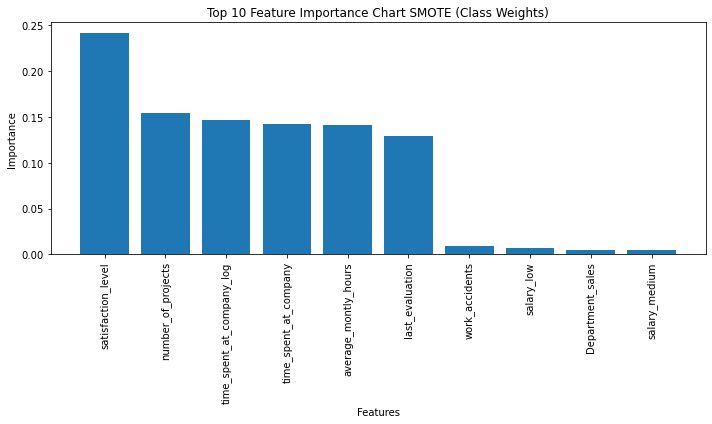

In [102]:
# Get feature importances
importances_smote = rf_model_balanced.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_smote = pd.DataFrame({'Feature': X.columns, 'Importance': importances_smote})

# Sort the DataFrame by importance (descending)
feature_importance_df_smote = feature_importance_df_smote.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(feature_importance_df_smote['Feature'], feature_importance_df_smote['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Chart SMOTE (Class Weights)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#Optional: Print the feature importance
print(feature_importance_df_smote)

#If you have many features you might want to show only the top n:

n_top_features = 10 #Show the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_smote['Feature'][:n_top_features], feature_importance_df_smote['Importance'][:n_top_features]) #Slicing the dataframe
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Top {n_top_features} Feature Importance Chart SMOTE (Class Weights)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [103]:
# 1. Using class weights to address imbalance (XGBoost can use sample weights):

# Calculate class weights (convert to dictionary)
class_weights = class_weight.compute_class_weight('balanced', classes=y_train.unique(), y=y_train)
class_weights_dict = dict(zip(y_train.unique(), class_weights))

# Convert class weights to sample weights (XGBoost uses sample weights)
sample_weights = [class_weights_dict[label] for label in y_train]

In [104]:
# Train XGBoost with sample weights
xgb_model_balanced = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')  # eval_metric is important

In [105]:
%%time
xgb_model_balanced.fit(X_train, y_train, sample_weight=sample_weights)

CPU times: user 1min 16s, sys: 129 ms, total: 1min 16s
Wall time: 38.2 s


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Fitting this model took sometimes 38s to  13min and 59s

In [106]:
# Make predictions
y_pred_balanced = xgb_model_balanced.predict(X_test)
y_prob_balanced = xgb_model_balanced.predict_proba(X_test)[:, 1]

In [107]:
# Evaluate
print("XGBoost with Sample Weights:")
print(classification_report(y_test, y_pred_balanced))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_balanced))
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
auc_balanced = roc_auc_score(y_test, y_prob_balanced)
print(f"AUC: {auc_balanced}")

XGBoost with Sample Weights:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399

Confusion Matrix:
 [[1980   21]
 [  26  372]]
Accuracy: 0.980408503543143
AUC: 0.982803824218544


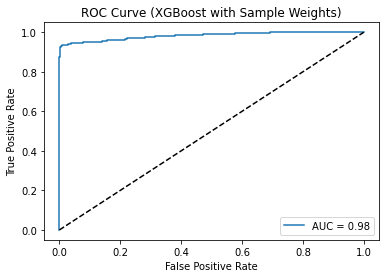

In [108]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_balanced)
plt.plot(fpr, tpr, label=f"AUC = {auc_balanced:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost with Sample Weights)')
plt.legend()
plt.show()

In [109]:
# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [110]:
# Train XGBoost on the SMOTE-resampled data
xgb_model_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [111]:
xgb_model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [121]:
# Make predictions
y_pred_smote_2 = xgb_model_smote.predict(X_test)
y_prob_smote_2 = xgb_model_smote.predict_proba(X_test)[:, 1]

In [122]:
# Evaluate
print("XGBoost with Sample Weights:")
print(classification_report(y_test, y_pred_smote_2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote_2))
print("Accuracy:", accuracy_score(y_test, y_pred_smote_2))
auc_smote_2 = roc_auc_score(y_test, y_prob_smote_2)
print(f"AUC: {auc_smote_2}")

XGBoost with Sample Weights:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

Confusion Matrix:
 [[1982   19]
 [  27  371]]
Accuracy: 0.9808253438932889
AUC: 0.9786262647570688


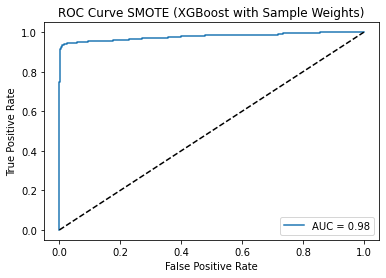

In [123]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_smote_2)
plt.plot(fpr, tpr, label=f"AUC = {auc_smote_2:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve SMOTE (XGBoost with Sample Weights)')
plt.legend()
plt.show()

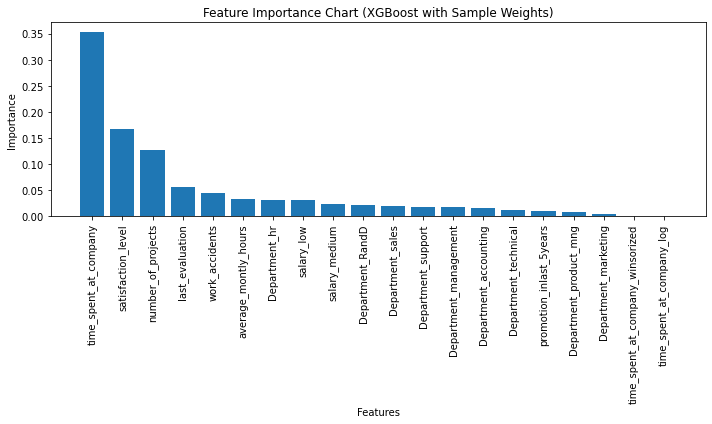

                             Feature  Importance
4              time_spent_at_company    0.353879
0                 satisfaction_level    0.167651
2                 number_of_projects    0.126688
1                    last_evaluation    0.056647
5                     work_accidents    0.043975
3               average_montly_hours    0.032792
11                     Department_hr    0.031691
18                        salary_low    0.030690
19                     salary_medium    0.023793
9                   Department_RandD    0.022049
15                  Department_sales    0.019155
16                Department_support    0.018992
12             Department_management    0.018601
10             Department_accounting    0.015735
17              Department_technical    0.012102
6            promotion_inlast_5years    0.010696
14            Department_product_mng    0.009329
13              Department_marketing    0.005536
8   time_spent_at_company_winsorized    0.000000
7          time_spen

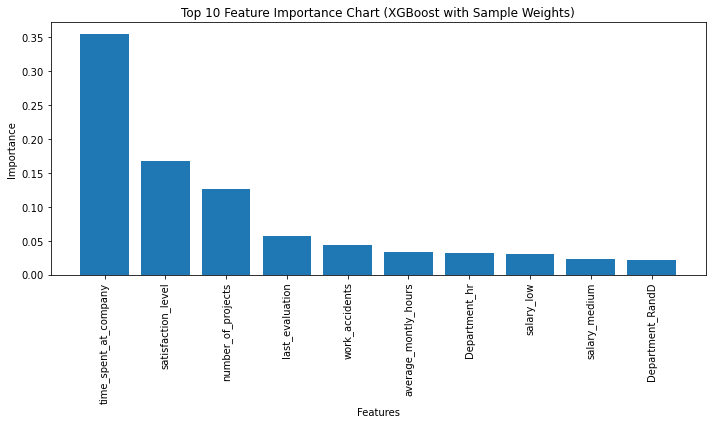

In [124]:
# Get feature importances
importances_balanced = xgb_model_balanced.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_balanced = pd.DataFrame({'Feature': X.columns, 'Importance': importances_balanced})

# Sort the DataFrame by importance (descending)
feature_importance_df_balanced = feature_importance_df_balanced.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(feature_importance_df_balanced['Feature'], feature_importance_df_balanced['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Chart (XGBoost with Sample Weights)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#Optional: Print the feature importance
print(feature_importance_df_balanced)

#If you have many features you might want to show only the top n:

n_top_features = 10 #Show the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_balanced['Feature'][:n_top_features], feature_importance_df_balanced['Importance'][:n_top_features]) #Slicing the dataframe
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Top {n_top_features} Feature Importance Chart (XGBoost with Sample Weights)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


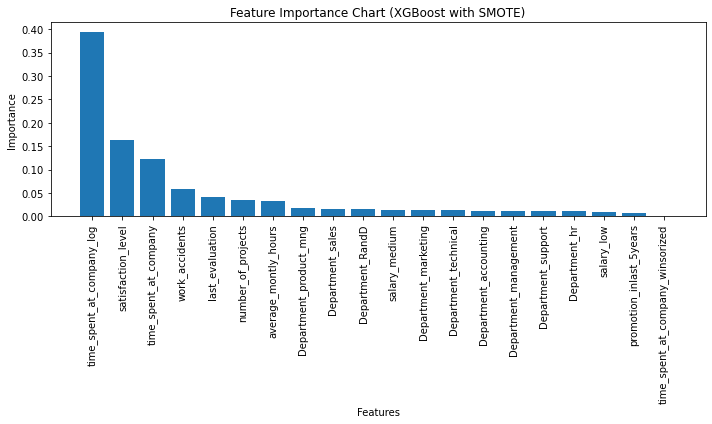

                             Feature  Importance
7          time_spent_at_company_log    0.394695
0                 satisfaction_level    0.163412
4              time_spent_at_company    0.121648
5                     work_accidents    0.057789
1                    last_evaluation    0.041912
2                 number_of_projects    0.035041
3               average_montly_hours    0.032759
14            Department_product_mng    0.017492
15                  Department_sales    0.015017
9                   Department_RandD    0.014792
19                     salary_medium    0.013663
13              Department_marketing    0.013308
17              Department_technical    0.012969
10             Department_accounting    0.012557
12             Department_management    0.012182
16                Department_support    0.012073
11                     Department_hr    0.010712
18                        salary_low    0.009862
6            promotion_inlast_5years    0.008117
8   time_spent_at_co

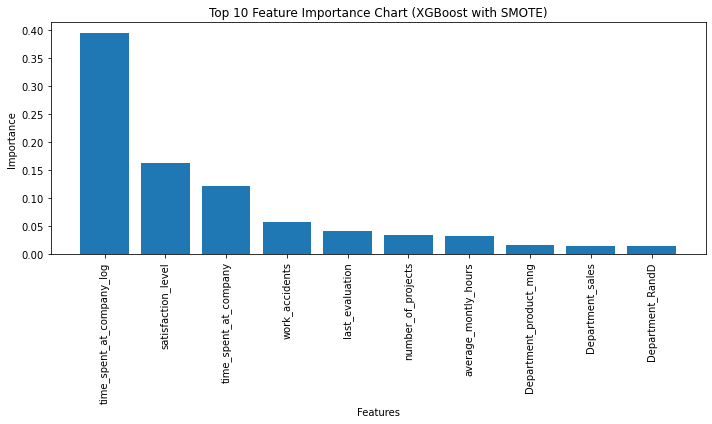

In [125]:
# Get feature importances
importances_smote = xgb_model_smote.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df_smote = pd.DataFrame({'Feature': X_train_smote.columns, 'Importance': importances_smote}) #Use X_train_smote.columns

# Sort the DataFrame by importance (descending)
feature_importance_df_smote = feature_importance_df_smote.sort_values(by='Importance', ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(feature_importance_df_smote['Feature'], feature_importance_df_smote['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Chart (XGBoost with SMOTE)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability if needed
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#Optional: Print the feature importance
print(feature_importance_df_smote)

#If you have many features you might want to show only the top n:

n_top_features = 10 #Show the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df_smote['Feature'][:n_top_features], feature_importance_df_smote['Importance'][:n_top_features]) #Slicing the dataframe
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title(f'Top {n_top_features} Feature Importance Chart (XGBoost with SMOTE)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### SMOTE

Smote didn't provide any noticable improvments for Random Forest Model or XGBoost. Perhaps because RF and XGBoost are already robust to imbalances.

### Identify the type of prediction task.

#### The prediction task is binary classification.

Specifically, it's predicting whether an employee will leave the company (the "left" variable), which has two possible outcomes (yes/no, or 1/0).  This is a classic example of binary classification.

### Identify the types of models most appropriate for this task.

#### Random Forest: 
- Excellent for classification, handles non-linear relationships well, robust to outliers, and provides feature importance estimates. 

#### XGBoost (Extreme Gradient Boosting): 
- Often outperforms Random Forest. Handles non-linearities, interactions, and missing data well. Provides feature importance. A strong contender.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



### Random Forest (Class Weights):

- High Overall Accuracy (0.99): Excellent at correctly classifying both employees who stayed and left.
- Near-Perfect Precision for Stayed (0.98): Very few false positives (predicting someone will leave when they stay).
- High Precision for Left (0.99): Very few false positives (predicting someone will stay when they leave).
- Good Recall for Stayed (1.00): Almost perfectly identifies all employees who stayed.
- Good Recall for Left (0.92): Correctly identifies 92% of employees who left, with some false negatives.
- Confusion Matrix: Shows a low number of misclassifications overall.

### XGBoost (Sample Weights):

- High Overall Accuracy (0.98): Also excellent, slightly lower than Random Forest.
- High Precision for Stayed (0.99): Similar to Random Forest.
- Moderate Precision for Left (0.95): Slightly lower than Random Forest, meaning more false positives for those who left.
- Good Recall for Stayed (0.99): Similar to Random Forest.
- Good Recall for Left (0.93): Slightly higher than Random Forest, meaning fewer false negatives for those who left.
- Confusion Matrix: Shows a trade-off with more false positives for "stayed" and fewer false negatives for "left" compared to Random Forest.
- AUC (0.98): Excellent ability to distinguish between employees who stay and leave.


### The "best" model depends on Salifort Motors' priorities:

- Random Forest: If minimizing false positives for "left" (reducing unnecessary interventions) is crucial, Random Forest is slightly better.
- XGBoost: If minimizing false negatives for "left" (identifying as many departing employees as possible) is more important, XGBoost has a slight edge. Also, the higher AUC suggests that overall it is better at distinguishing between the two classes.

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- The XGBoost model, trained with sample weights to address class imbalance, achieved an excellent AUC score of 0.98. This indicates the model's strong ability to distinguish between employees who stay and those who leave.  The ROC curve visually confirms this high level of performance across various classification thresholds.  This suggests the model is a valuable tool for proactively identifying at-risk employees.

### Conclusion, Recommendations, Next Steps

- This project successfully developed a predictive model to identify employees at high risk of leaving Salifort Motors.  The XGBoost model, leveraging key factors like average monthly hours, number of projects, and promotion status, demonstrated strong predictive capabilities (AUC = 0.98).  This data-driven approach offers a significant opportunity to proactively address employee turnover.

### Recommendations:

#### Salifort Motors should prioritize targeted interventions focusing on:

- Workload Management: Implement strategies to monitor and balance employee workload, especially for those with high hours and numerous projects.
- Career Development: Create clear career paths, offer growth opportunities, and ensure regular performance feedback to address the impact of limited promotion opportunities.
- Employee Engagement: Invest in initiatives to improve employee satisfaction, morale, and overall engagement.

### Next Steps:

- Develop an HR Dashboard: Create a user-friendly dashboard to provide HR staff with easy access to model predictions, visualizations of at-risk employees (by department, role, etc.), and tools to track the effectiveness of interventions.
- Pilot Program: Implement a pilot retention program targeting employees identified as high-risk by the model. Evaluate the program's impact on reducing turnover rates.
- Integration and Monitoring: Integrate the model into existing HR processes and establish a system for ongoing monitoring of model performance. Regularly retrain the model with new data to maintain and improve its accuracy.
- Further Data Collection: Explore collecting additional data, such as employee performance reviews, exit interview feedback, and more detailed demographic information, to potentially enhance the model's predictive power and provide deeper insights into the drivers of employee turnover.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.